In [1]:
f=open("ip2location.csv")

In [2]:
import pandas as pd
df=pd.read_csv("ip2location.csv")
df

,low,high,code,region
0,0,16777215,-,-
1,16777216,16777471,US,United States of America
2,16777472,16778239,CN,China
3,16778240,16779263,AU,Australia
4,16779264,16781311,CN,China
...,...,...,...,...
174967,3758094336,3758095359,HK,Hong Kong
174968,3758095360,3758095871,CN,China
174969,3758095872,3758096127,SG,Singapore
174970,3758096128,3758096383,AU,Australia


In [3]:
print(df.loc[0]['high'])
import netaddr
#int(netaddr.IPAddress("1.1.1.1"))


16777215


In [4]:
for i in range(5,0,-1) :
    print(i)

5
4
3
2
1


In [5]:
!ls

3035.svg  README.md	   geo.svg	    out.svg	     tester.py
4036.svg  actual.json	   ip2location.csv  results.json     untitled.txt
4144.svg  debugging.ipynb  main.py	    server_log.zip
4248.svg  docs.zip	   mainlist.py	    server_log2.zip
4555.svg  expected.json    nohup.out	    temp.zip


In [6]:
!python3 main.py ip_check 1.1.1.1 5.5.5.5 9.9.9.9 7.7.7.7 5.5.5.4 5.5.5.5 5.5.5.6 5.5.5.7 5.5.5.8 5.5.5.9

[{"ip": "1.1.1.1", "int_ip": 16843009, "region": "United States of America", "ms": 0.007453203201293945}, {"ip": "5.5.5.5", "int_ip": 84215045, "region": "Germany", "ms": 0.008594989776611328}, {"ip": "9.9.9.9", "int_ip": 151587081, "region": "United States of America", "ms": 0.014947652816772461}, {"ip": "7.7.7.7", "int_ip": 117901063, "region": "United States of America", "ms": 0.0009908676147460938}, {"ip": "5.5.5.4", "int_ip": 84215044, "region": "Germany", "ms": 0.006427288055419922}, {"ip": "5.5.5.5", "int_ip": 84215045, "region": "Germany", "ms": 2.1696090698242188e-05}, {"ip": "5.5.5.6", "int_ip": 84215046, "region": "Germany", "ms": 1.239776611328125e-05}, {"ip": "5.5.5.7", "int_ip": 84215047, "region": "Germany", "ms": 1.1205673217773438e-05}, {"ip": "5.5.5.8", "int_ip": 84215048, "region": "Germany", "ms": 2.3365020751953125e-05}, {"ip": "5.5.5.9", "int_ip": 84215049, "region": "Germany", "ms": 1.1682510375976562e-05}]


In [7]:
from zipfile import ZipFile, ZIP_DEFLATED
import re
from io import TextIOWrapper

file_list=[]
with ZipFile("docs.zip") as zf:
    for i in zf.namelist():
        if(i.endswith('-index.htm')):
            file_list.append(i)
    with zf.open(file_list[0], 'r') as file:
        data=str(file.read())

address=re.findall(r"\w+\s+\w{2}\s\d{5}(?:\-\d{4})?",data)
state=re.findall(r"NY|CA|WI|IL",address[0])
zipcode=re.findall(r"\d{5}(?:\-\d{4})?",address[1])

print(state)


['CA']


In [8]:
import pandas as pd
import netaddr
import csv 
from io import TextIOWrapper




with ZipFile("server_log.zip","r", compression=ZIP_DEFLATED) as zf:
    with zf.open("rows.csv", "r") as f:
        
        
         
reader = csv.DictReader(TextIOWrapper(f, 'utf-8'))
readerlist=[]
for row in reader:
    readerlist.append(row)

        
readerlist

IndentationError: expected an indented block (1048189230.py, line 14)

In [ ]:
import netaddr
int(netaddr.IPAddress("104.197.32.000"))

In [ ]:
!python3 main.py region server_log.zip server_log2.zip


In [ ]:
!python3 tester.py



In [ ]:
!python3 main.py zipcode docs.zip

In [ ]:
!python3 main.py geo 3035 out.svg

In [ ]:
import pyproj
proj=3035
crs = pyproj.CRS.from_epsg(proj)

i=0
world.loc[world['name'] == frequency.at[i,'index']['colorname']]='red'


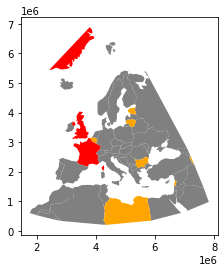

In [12]:
import pandas as pd
import geopandas
from shapely.geometry import Polygon, box, Point
with ZipFile("server_log2.zip", "r", compression=ZIP_DEFLATED) as zf:
    with zf.open("rows.csv", "r") as f: 
            df=pd.read_csv(f)
            
frequency=df['region'].value_counts().to_frame().reset_index()

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
import pyproj
crs = pyproj.CRS.from_epsg(3035)
#world=world.to_crs(crs)
world["colorname"]="gray"

world.loc[world['name']==frequency.at[0,'index']]
corresponding_frame=world.loc[world['name']==frequency.at[0,'index'],'colorname']

world.at[world['name'] == frequency.at[0,'index'],'colorname']='red'

for i in range(0,len(frequency)):
    corresponding_frame=world.loc[world['name']==frequency.at[i,'index'],'colorname']
    if(frequency.at[i,'region']>=1000):
        if(not corresponding_frame.empty):
            world.at[world['name'] == frequency.at[i,'index'],'colorname']='red'
    elif(frequency.at[i,'region']>=1):
        if(not corresponding_frame.empty):
            world.at[world['name'] == frequency.at[i,'index'],'colorname']='orange'


window = box(crs.area_of_use.west, crs.area_of_use.south, crs.area_of_use.east, crs.area_of_use.north)
cropped = world.intersection(window)
cropped = cropped[~cropped.is_empty]
cropped=cropped.to_crs(crs)

ax=cropped.plot(color=world["colorname"])




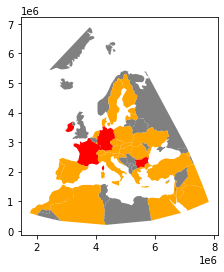

In [32]:
 with ZipFile("server_log2.zip", "r", compression=ZIP_DEFLATED) as zf:
    with zf.open("rows.csv", "r") as f: 
        df=pd.read_csv(f)
    espg=3035       
    frequency=df['region'].value_counts().to_frame().reset_index()

    world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
    crs = pyproj.CRS.from_epsg(espg)
#     world=world.to_crs(crs)
    world["colorname"]="gray"

   
    corresponding_frame=world.loc[world['name']==frequency.at[0,'index'],'colorname']

    world.at[world['name'] == frequency.at[0,'index'],'colorname']='red'

    for i in range(0,len(frequency)):
        corresponding_frame=world.loc[world['name']==frequency.at[i,'index'],'colorname']
        if(frequency.at[i,'region']>=1000):
            if(not corresponding_frame.empty):
                world.at[world['name'] == frequency.at[i,'index'],'colorname']='red'
        elif(frequency.at[i,'region']>=1):
            if(not corresponding_frame.empty):
                world.at[world['name'] == frequency.at[i,'index'],'colorname']='orange'

window = box(crs.area_of_use.west, crs.area_of_use.south, crs.area_of_use.east, crs.area_of_use.north)
world["geometry"] = world["geometry"].intersection(window)
world = world[~world.is_empty]
ax=world.to_crs(crs).plot(color=world["colorname"])


# pd.set_option("display.max_rows", None, "display.max_columns", None)



In [33]:
!python3 main.py geo 3035 out.svg

In [34]:
!python3 tester.py


Running tests...
TEST ip_check (25 points possible)
RUN: python3 main.py ip_check 1.1.1.1 5.5.5.5 9.9.9.9 7.7.7.7 5.5.5.4 5.5.5.5 5.5.5.6 5.5.5.7 5.5.5.8 5.5.5.9
TEST RESULT: 25 of 25 points
TEST region (25 points possible)
RUN: python3 main.py region server_log.zip temp.zip
TEST RESULT: 25 of 25 points
TEST zipcode (25 points possible)
RUN: python3 main.py zipcode docs.zip
TEST RESULT: 25.0 of 25 points
TEST geo (25 points possible)
RUN: python3 main.py geo 3035 3035.svg
RUN: python3 main.py geo 4036 4036.svg
RUN: python3 main.py geo 4144 4144.svg
RUN: python3 main.py geo 4248 4248.svg
RUN: python3 main.py geo 4555 4555.svg
TEST RESULT: 25 of 25 points
Earned 100.0 of 100 points across all tests
SCORE: 100.0% (details in results.json)


In [ ]:
!python3 main.py zipcode docs.zip